# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()


array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [16]:
#Mutulation of information
X= df.drop("booking_complete",axis=1)
#transform objet to number 
for colonne in X.select_dtypes("object"): 
    X[colonne],_= X[colonne].factorize()   
X.dtypes
y = df.booking_complete

In [17]:
# information variable
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores
     

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


route                    0.052489
booking_origin           0.046768
flight_duration          0.018016
length_of_stay           0.008840
wants_extra_baggage      0.007782
wants_in_flight_meals    0.003324
sales_channel            0.002275
purchase_lead            0.001739
flight_day               0.001177
num_passengers           0.000919
trip_type                0.000343
flight_hour              0.000000
wants_preferred_seat     0.000000
Name: MI Scores, dtype: float64

/tmp/ipykernel_8668/1723647910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores, y=mi_scores.index, palette="viridis")


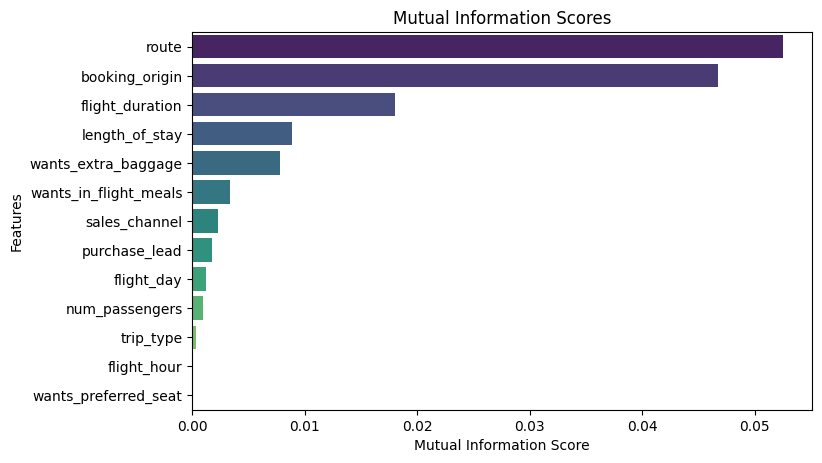

In [28]:
plt.figure(dpi=100, figsize=(8, 5))
sns.barplot(x=mi_scores, y=mi_scores.index, palette="viridis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Mutual Information Scores")
plt.show()


In [30]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)
     

from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X
     


In [32]:
# Model 1 : Random forest classifier with top 5 features
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','length_of_stay','wants_extra_baggage']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))
     

ACCURACY:  83.19
AUC score:  0.5569051956216852


In [33]:
# Model 2 : Random forest classifier for all features

X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


### XGB for 5 features 

In [38]:
!pip install xgboost

from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))
     

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 869.3 kB/s eta 0:00:00m eta 0:00:010:00:08
ACCURACY:  84.67
AUC score:  0.5210892893146868


In [39]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.09
AUC score:  0.5577796717361984


In [40]:
feature_importances = pd.Series(forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


purchase_lead      0.145159
flight_hour        0.120018
length_of_stay     0.109176
num_passengers     0.047789
flight_duration    0.037145
                     ...   
route_ICNJED       0.000000
route_COKCTS       0.000000
route_KNOWUH       0.000000
route_PERSWA       0.000000
route_TPEURT       0.000000
Length: 923, dtype: float64


/tmp/ipykernel_8668/437019465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


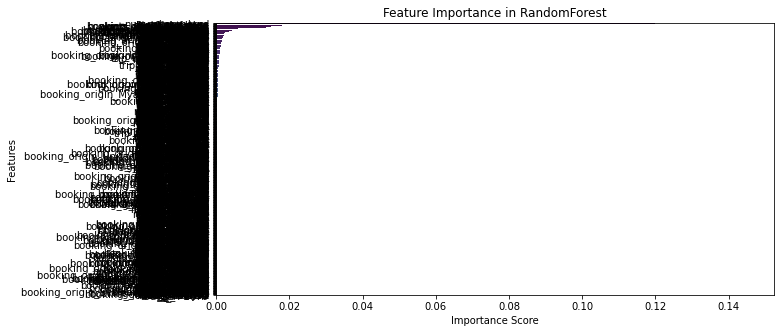

In [41]:
feature_importances = pd.Series(forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in RandomForest")
plt.show()


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

# Séparer les features et la target
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Vérifier la distribution des classes
print(y.value_counts(normalize=True))  # Pour voir le déséquilibre

# Appliquer One-Hot Encoding
X = pd.get_dummies(X)

# Normaliser (même si RandomForest n'en a pas besoin, ça peut aider d'autres modèles)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser en train/test
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
# Calculer les poids des classes (utile si dataset déséquilibré)
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

# Créer et entraîner le modèle avec class_weight
forest_model = RandomForestClassifier(random_state=1, class_weight=class_weights_dict, n_estimators=100, max_depth=10)
forest_model.fit(train_X, train_y)

# Prédictions
preds = forest_model.predict(test_X)

# Évaluer la performance
accuracy = accuracy_score(test_y, preds) * 100
auc = roc_auc_score(test_y, preds)

print(f'ACCURACY: {accuracy:.2f}%')
print(f'AUC score: {auc:.4f}')


booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64
ACCURACY: 67.19%
AUC score: 0.6975


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight


# Séparer les features et la variable cible
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Vérifier la distribution des classes
print(y.value_counts(normalize=True))  # Pour voir le déséquilibre

# Appliquer One-Hot Encoding pour les variables catégoriques
X = pd.get_dummies(X)

# Normaliser les features (important pour la régression logistique)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en train/test (80% train, 20% test)
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



# Définir la régression logistique avec class_weight pour gérer les classes déséquilibrées
log_reg = LogisticRegression(random_state=1, class_weight="balanced", max_iter=500)

# Entraîner le modèle
log_reg.fit(train_X, train_y)

# Faire des prédictions
preds = log_reg.predict(test_X)

# Évaluer les performances
accuracy = accuracy_score(test_y, preds) * 100
auc = roc_auc_score(test_y, preds)

print(f'ACCURACY: {accuracy:.2f}%')
print(f'AUC score: {auc:.4f}')


booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64
ACCURACY: 70.01%
AUC score: 0.7218


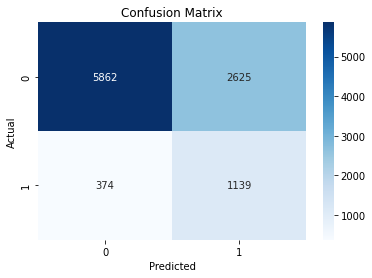

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.80      8487
           1       0.30      0.75      0.43      1513

    accuracy                           0.70     10000
   macro avg       0.62      0.72      0.61     10000
weighted avg       0.84      0.70      0.74     10000



In [46]:
# Matrice de confusion
cm = confusion_matrix(test_y, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Rapport de classification (précision, rappel, F1-score)
print("Classification Report:\n", classification_report(test_y, preds))
